In [19]:
# Importing the Keras libraries and packages
# from keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense
# from keras.models import model_from_json
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

import numpy as np
from matplotlib import pyplot as plt

In [20]:
tf.config.list_physical_devices('GPU')

[]

In [21]:
BATCH_SIZE = 64
DATA_DIR = 'data2'
TRAIN_DIR = f'{DATA_DIR}\\train'
TEST_DIR = f'{DATA_DIR}\\test'
CLASSES = ["arm", "chest", "elbow", "foot", "hand", "knee", "leg", "pelvis", "shoulder", "skull", "spine"]
MODEL_NAME = 'model2'

In [22]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=BATCH_SIZE,
        # Specify the classes explicitly
        classes = CLASSES,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 0 images belonging to 11 classes.


In [23]:
model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
        # The first convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a dense layer
        tf.keras.layers.Flatten(),
        # 128 neuron in the fully-connected layer
        tf.keras.layers.Dense(128, activation='relu'),
        # 5 output neurons for 5 classes with the softmax activation
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,059 (898.67 KB)

 Trainable params: 230,059 (898.67 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

total_sample=train_generator.n

n_epochs = 30

In [26]:
history = model.fit(
        train_generator, 
        steps_per_epoch=int(total_sample/BATCH_SIZE),  
        epochs=n_epochs,
        verbose=1)

ValueError: Must provide at least one structure

In [ ]:
model.save(f'{MODEL_NAME}.h5')

In [27]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'history' is not defined

<Figure size 640x480 with 0 Axes>

In [28]:
fig = plt.figure()
plt.plot(history.history['acc'], color='orange',label='acc')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'history' is not defined

<Figure size 640x480 with 0 Axes>

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [30]:
model = tf.keras.models.load_model(f'{MODEL_NAME}.h5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'model2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [32]:
test_image = image.load_img(f'{TEST_DIR}/leg/10000.jpg', target_size = (200,200))

FileNotFoundError: [Errno 2] No such file or directory: 'data2\\test/leg/10000.jpg'

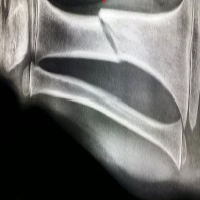

In [ ]:
test_image

In [ ]:
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


In [ ]:
result

array([[1.3549077e-16, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
print(CLASSES[[i for i, value in enumerate(result[0]) if value == 1][0]])

leg


# Adding new images

In [62]:
# model = tf.keras.models.load_model(f'{MODEL_NAME}.h5')
model = tf.keras.models.load_model("/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Project_update_16.06/Infa_Kognitywna_Projekt/bone_fracture_detection/model2.h5")

In [63]:
# new_image = "your_local_file"
# new_image = "bone_fracture_detection/images_to_upload/1.jpeg"
new_image = image.load_img("/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Project_update_16.06/Infa_Kognitywna_Projekt/bone_fracture_detection/images_to_upload/1.jpeg", target_size = (200,200))
new_image_path = "/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Project_update_16.06/Infa_Kognitywna_Projekt/bone_fracture_detection/data2/test/leg/10000.jpg"

FileNotFoundError: [Errno 2] No such file or directory: '/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Project_update_16.06/Infa_Kognitywna_Projekt/bone_fracture_detection/data2/test/leg/10000.jpg'

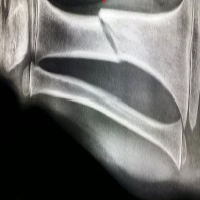

In [54]:
new_image

In [55]:
new_image = np.expand_dims(new_image, axis=0)
result = model.predict(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [60]:
import os
import shutil
def addingToData2(result, filename="test.jpg"):
    class_name = CLASSES[[i for i, value in enumerate(result[0]) if value == 1][0]]
    print(class_name)

    file_path = os.path.join("/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Project_update_16.06/Infa_Kognitywna_Projekt/bone_fracture_detection/data2", "test", class_name, filename)

    shutil.move(new_image_path, file_path)
        
    print(f"Result '{class_name}' saved to {file_path}")

In [61]:
addingToData2(result)

leg
Result 'leg' saved to /Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Project_update_16.06/Infa_Kognitywna_Projekt/bone_fracture_detection/data2/test/leg/test.jpg
